## **Brain Tumor Classification Using CNN**

In [1]:
import tensorflow as tf
import pickle
import numpy as np
from model import TumorClassifier

In [ ]:
### ONLY RUN IF YOU WANT TO OVERRIDE PREVIOUSLY SAVE MODEL WEIGHTS ###

# Training New Model
# %run main.py

In [4]:
### Load Data
with open("train.pickle", "rb") as file:
    X_train = tf.cast(pickle.load(file), dtype=tf.float64)
    Y_train = tf.cast(pickle.load(file), dtype=tf.int64)

with open("test.pickle", "rb") as file:
    X_test = tf.cast(pickle.load(file), dtype=tf.float64)
    Y_test = tf.cast(pickle.load(file), dtype=tf.int64)

Y_train = tf.expand_dims(Y_train, 1)
Y_test = tf.expand_dims(Y_test, 1)

### Loading in Model
model = TumorClassifier()
model(X_test[0:1]) # Calls model to initialize weights

model.load_weights('model_weights.h5')

True: 1
Pred: 1


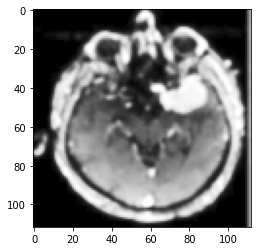

True: 3
Pred: 3


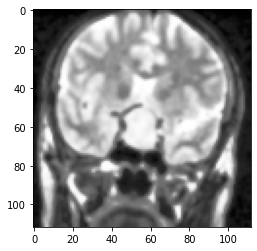

True: 0
Pred: 1


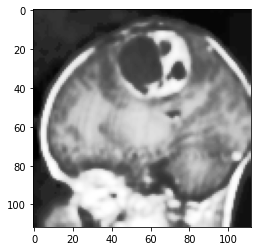

True: 0
Pred: 2


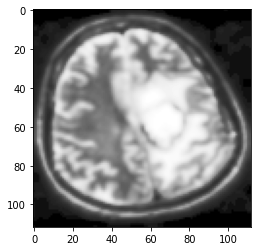

True: 0
Pred: 2


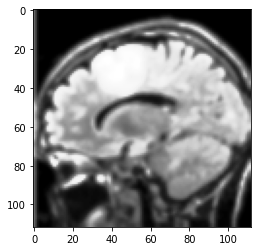

In [28]:
import matplotlib.pyplot as plt

for i in np.random.randint(0, 394, 5):
    # Show the tensor as an image using Matplotlib
    print('True:', Y_test[i].numpy()[0])
    print('Pred:', np.argmax(model(X_test[i:i+1], False)))
    plt.imshow(X_test[i], cmap='gray')
    plt.show()

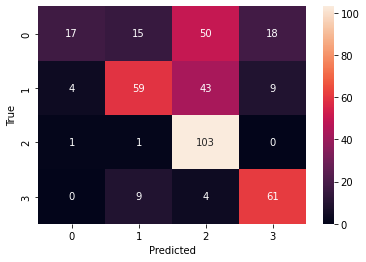

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming predicted and true values are in arrays pred and true respectively
confusion = confusion_matrix(Y_test, np.argmax(model(X_test, False),1))

# Visualize the confusion matrix as a heatmap
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()